In [1]:
import pyzbar.pyzbar as pyzbar
from PIL import Image
import numpy as np
from PIL import ImageDraw
import math

# 读取二维码信息
def QR_read(img):
    QR_Info = set()
    QR_goods = pyzbar.decode(img)

    # 二维码解码
    for barcode in QR_goods:
        barcodeData = barcode.data.decode("utf-8")
        print(barcodeData)
        QR_Info.add(barcodeData)

    # 判断二维码是否为空
    if len(QR_Info) == 0:
        QR_Info = 'none'
    print(QR_Info)
    return QR_Info

def drawrec(row,col,flag):
    if flag == 0: #空 黄色
        draw.rectangle((100*(col-1), 50*(row-1), 100*col, 50*row), 'yellow', 'black')  # 对角线顶点（左上和右下）
    elif flag == 1: #摆放正确 绿色
        draw.rectangle((100*(col-1), 50*(row-1), 100*col, 50*row), 'green', 'black')  # 对角线顶点（左上和右下）
    elif flag == 2: #摆放错误 红色
        draw.rectangle((100*(col-1), 50*(row-1), 100*col, 50*row), 'red', 'black')  # 对角线顶点（左上和右下）


#read_directory("QRcode")
#imgs=array_of_img[0]
#imgs.show()

#货架和货物个数
shelf_num = 12
good_num = shelf_num
#行和列数
row=3
col=4
pailie_info = np.zeros((3,4))

# 生成绘图画布
array = np.ndarray((50*row, 100*col, 3), np.uint8)#定义大小

array[:, :, 0] = 250
array[:, :, 1] = 250
array[:, :, 2] = 250

image = Image.fromarray(array)
# 创建绘制对象
draw = ImageDraw.Draw(image)

#依次比较是否正确
for i in range(shelf_num):
    filename = i + 1

    shelf_QR_name = 'QR/' + 'S' + str(filename) + '.png'
    Simg = Image.open(shelf_QR_name)
    shelf_info_temp = QR_read(Simg)
    shelf_info = str(shelf_info_temp)
    s_num=shelf_info[6:8]

    goods_QR_name = 'QR/' + 'G' + str(filename) + '.png'
    Gimg = Image.open(goods_QR_name)
    good_info_temp = QR_read(Gimg)
    good_info = str(good_info_temp)
    g_num=good_info[6:8]

    # 求该货物所在行
    row_temp = math.ceil((i + 1) / 4)
    #print(row_temp)
    # 求所在列
    col_temp = (i + 1) - (row_temp - 1) * 4
    #print(col_temp)
    print(str(row_temp) + ',' + str(col_temp) + ':')
    if good_info_temp == 'none':
        #货架无货物-0
        location = 0
        print('none')
    elif g_num == s_num:
        #摆放正确-1
        location = 1
        print('right')
    else:
        # 摆放错误-2
        location = 2
        print('wrong')

    #绘制表示摆放正误的图像
    drawrec(row_temp, col_temp, location)

    #存储摆放信息
    pailie_info[row_temp-1][col_temp-1] = location



B01A0020200728
{'B01A0020200728'}
B11D0020200730
{'B11D0020200730'}
1,1:
right
B01A0120200728
{'B01A0120200728'}
B11D0120200730
{'B11D0120200730'}
1,2:
right
B01A0220200728
{'B01A0220200728'}
B11D0320200730
{'B11D0320200730'}
1,3:
wrong
B01A0320200728
{'B01A0320200728'}
none
1,4:
none
B01A0420200728
{'B01A0420200728'}
B11D0420200730
{'B11D0420200730'}
2,1:
right
B01A0520200728
{'B01A0520200728'}
B11D0220200730
{'B11D0220200730'}
2,2:
wrong
B01A0620200728
{'B01A0620200728'}
B11D0620200730
{'B11D0620200730'}
2,3:
right
B01A0720200728
{'B01A0720200728'}
B11D0720200730
{'B11D0720200730'}
2,4:
right
B01A0820200728
{'B01A0820200728'}
B11D0520200730
{'B11D0520200730'}
3,1:
wrong
B01A0920200728
{'B01A0920200728'}
none
3,2:
none
B01A1020200728
{'B01A1020200728'}
B11D1020200730
{'B11D1020200730'}
3,3:
right
B01A1120200728
{'B01A1120200728'}
B11D1120200730
{'B11D1120200730'}
3,4:
right


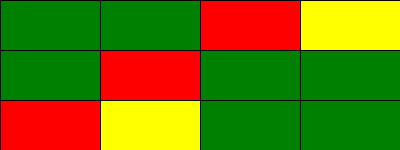

[[ 1.  1.  2.  0.]
 [ 1.  2.  1.  1.]
 [ 2.  0.  1.  1.]]
The goods in:
(0,1)
(1,3)
(2,2)
is wrong
The following shelves are missing goods
(0,2)
(1,0)


In [3]:
display(image)
#显示摆放信息
print(pailie_info)

print('The goods in:')
for k in range(3):
    for j in range(4):
        if pailie_info[k-1][j-1] == 2:
            print('(' + str(k)+ ',' + str(j) + ')')
print('is wrong')

print('The following shelves are missing goods')
for k in range(3):
    for j in range(4):
        if pailie_info[k-1][j-1] == 0:
            print('(' + str(k)+ ',' + str(j) + ')')
